In [37]:
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [38]:
df = pd.read_csv('/home/piyush/Desktop/bank/bank-additional-full.csv', sep=';')

In [39]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [40]:
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [41]:
print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))

Bank marketing dataset consists of 41188 rows.


In [42]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

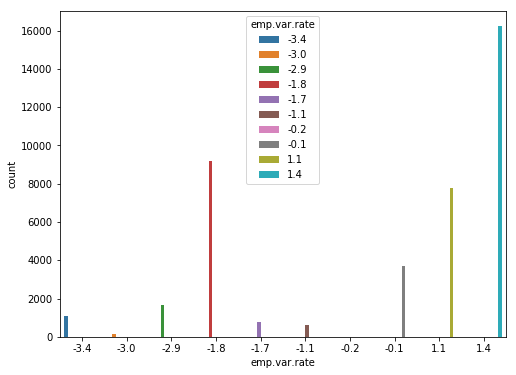

In [43]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='emp.var.rate', hue='emp.var.rate', data=df);

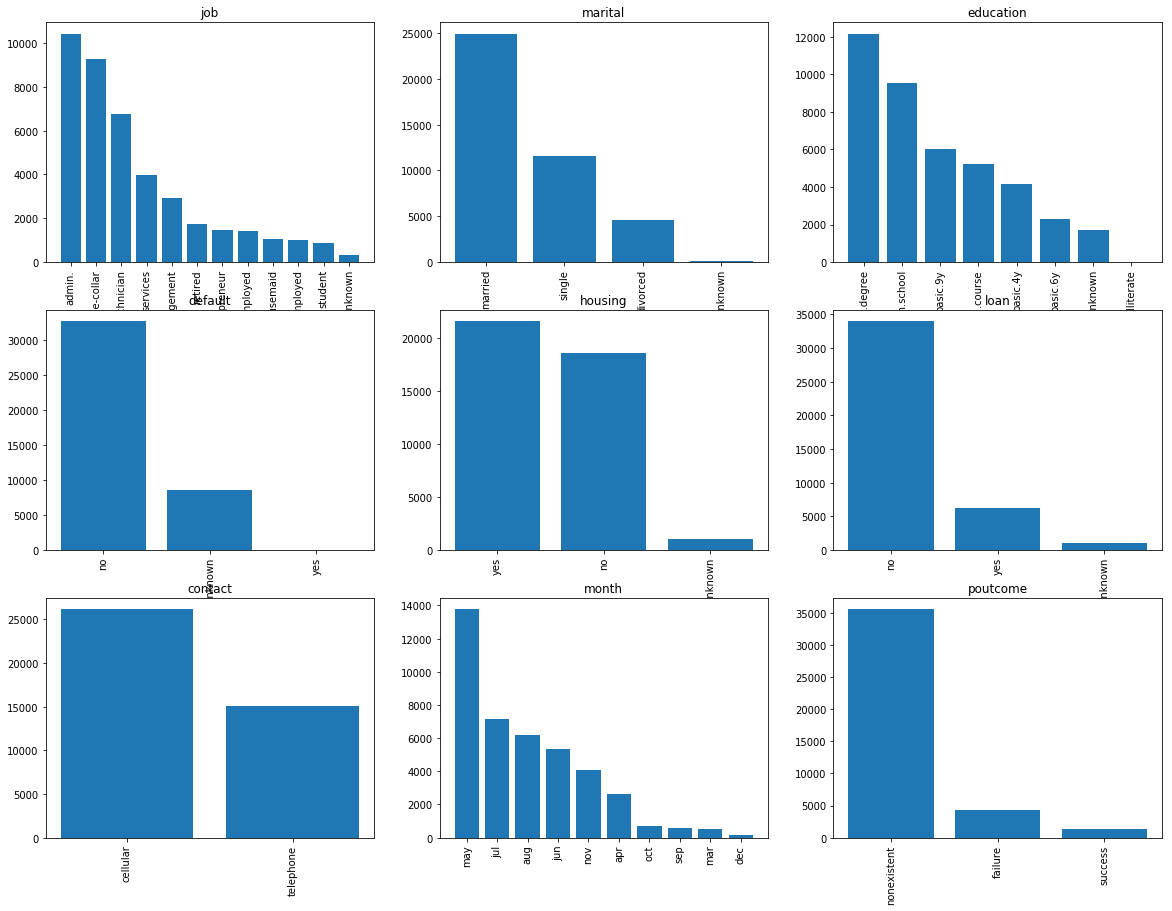

In [44]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    counter += 1

plt.show()        

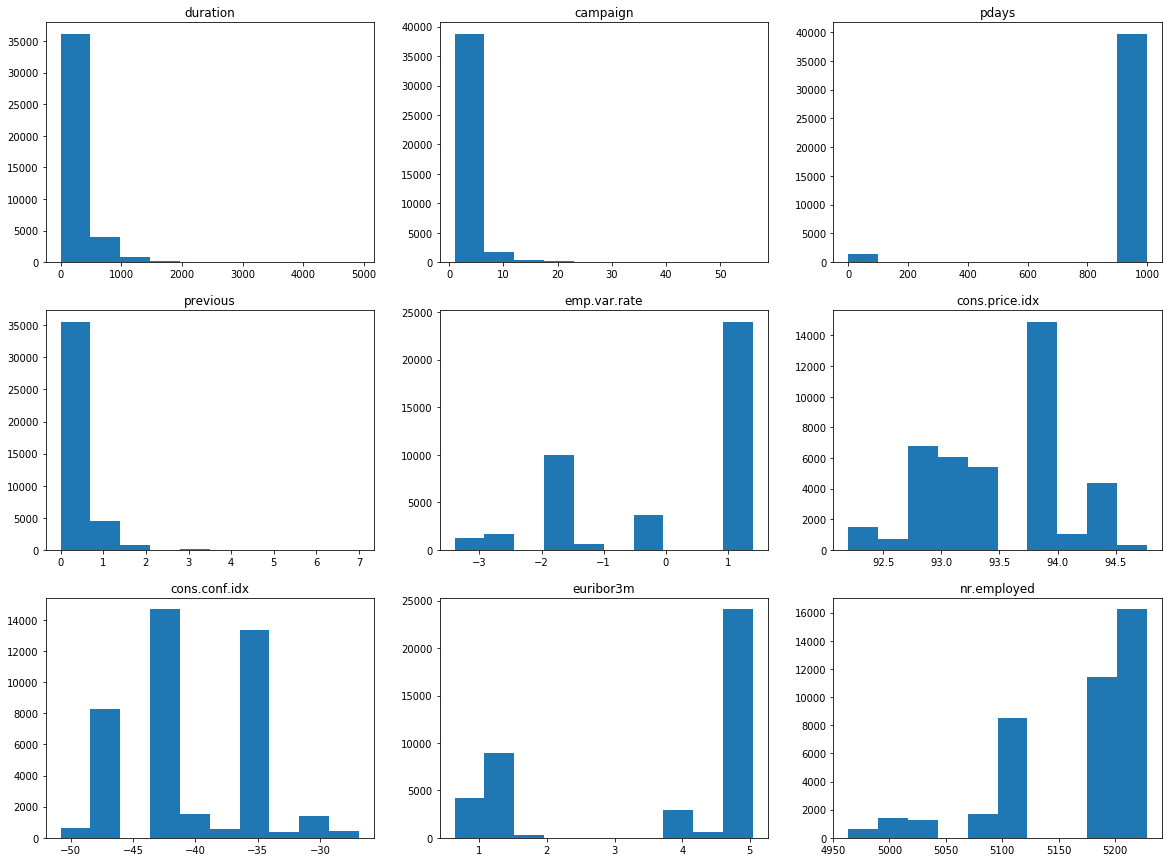

In [45]:
num_columns = ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [46]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,41188.000000,41188.000000,41188.000000
mean,962.475454,2.567593,0.172963
std,186.910907,2.770014,0.494901
min,0.000000,1.000000,0.000000
25%,999.000000,1.000000,0.000000
50%,999.000000,2.000000,0.000000
75%,999.000000,3.000000,0.000000
max,999.000000,56.000000,7.000000


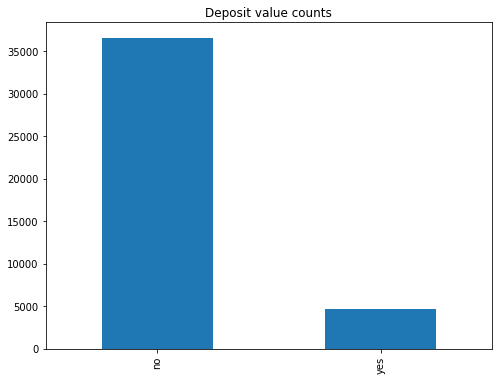

In [47]:
value_counts = df['y'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

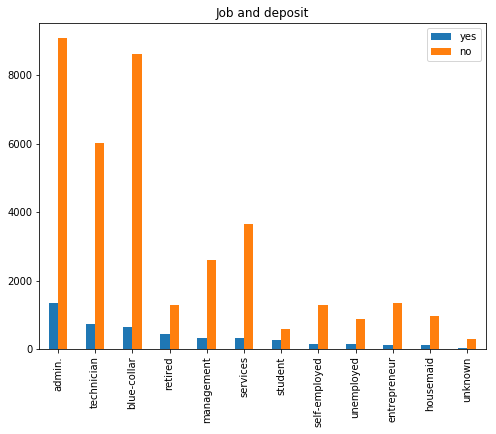

In [48]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

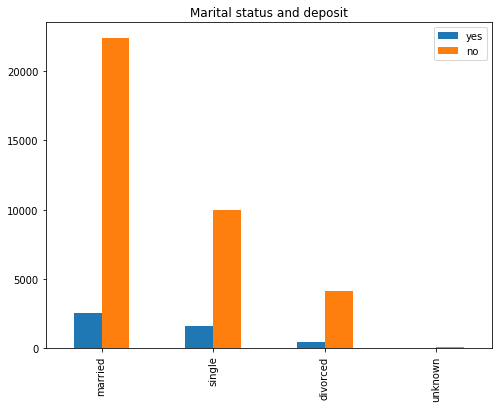

In [49]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['y'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

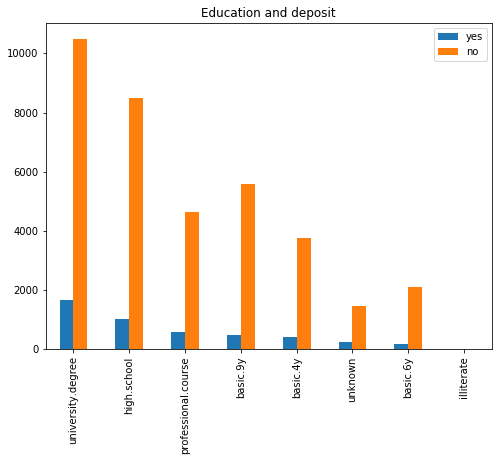

In [50]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['y'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

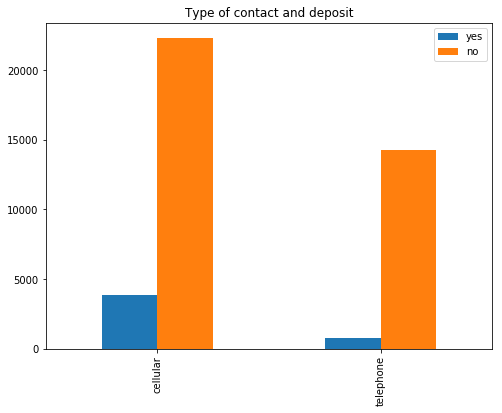

In [51]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['y'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

# Regarding the diagrams we can tell that according to our dataset:

1.Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.

2.Married customers are less likely to subscribe for term deposit.

3.Customers with 'cellular' type and 'telephone' type of contact are less likely to subscribe for term deposit.

4.Customer with university degree are less likely to subscribe for term deposit.

# Now let's look how numerical columns affect term deposit subscription.

In [52]:
a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (df[df['y'] == 'no'][['y','age']].describe())['age']

a_df

,age_yes,age_no
count,4640.000000,36548.000000
mean,40.913147,39.911185
std,13.837476,9.898132
min,17.000000,17.000000
25%,31.000000,32.000000
50%,37.000000,38.000000
75%,50.000000,47.000000
max,98.000000,95.000000


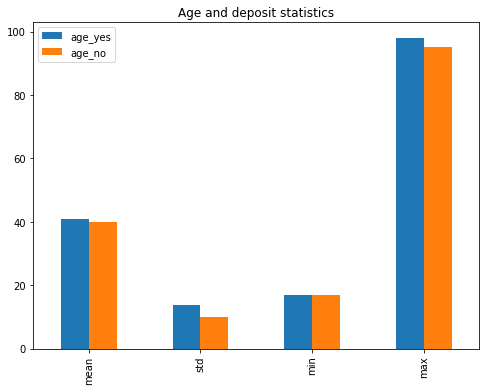

In [53]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [54]:
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['y'] == 'yes'][['y','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['y'] == 'no'][['y','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,4640.000000,36548.000000
mean,2.051724,2.633085
std,1.666245,2.873438
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,3.000000
max,23.000000,56.000000


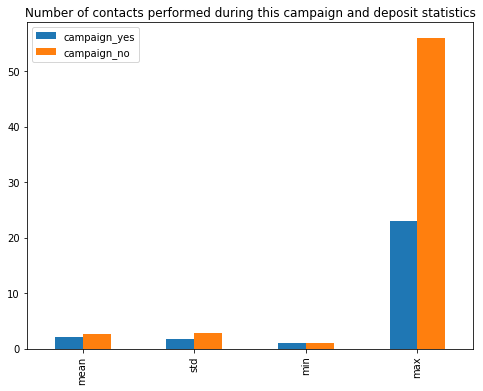

In [55]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [56]:
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['y'] == 'yes'][['y','previous']].describe())['previous']
p_df['previous_no'] = (df[df['y'] == 'no'][['y','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,4640.000000,36548.000000
mean,0.492672,0.132374
std,0.860344,0.409199
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,6.000000,7.000000


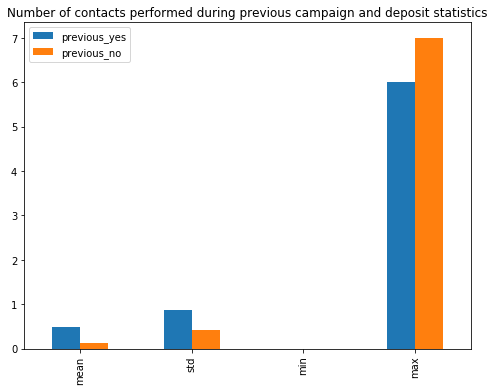

In [57]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

# Looking at the diagrams above we can conclude that:

1.People who subscribed for term deposit tend to have greater balance and age values.

2.People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

In [58]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [59]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_df = df.copy()
    
    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['default', 'housing', 'loan', 'y']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    #convert categorical columns to dummies
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'day_of_week']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
    
    #impute incorrect values and drop original columns
    cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

In [60]:
cleaned_df = clean_data(df)
cleaned_df.head()

,age,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_bool,housing_bool,loan_bool,...,month_oct,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,campaign_cleaned,previous_cleaned
0,56,261,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,0,0,1,0,1,0,0,0,1.0,0
1,57,149,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,0,0,1,0,1,0,0,0,1.0,0
2,37,226,1.1,93.994,-36.4,4.857,5191.0,0,1,0,...,0,0,1,0,1,0,0,0,1.0,0
3,40,151,1.1,93.994,-36.4,4.857,5191.0,0,0,0,...,0,0,1,0,1,0,0,0,1.0,0
4,56,307,1.1,93.994,-36.4,4.857,5191.0,0,0,1,...,0,0,1,0,1,0,0,0,1.0,0


In [61]:
X = cleaned_df.drop(columns = 'y_bool')
y = cleaned_df[['y_bool']]

In [62]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [64]:
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

XGB accuracy score for train: 0.946: test: 0.918


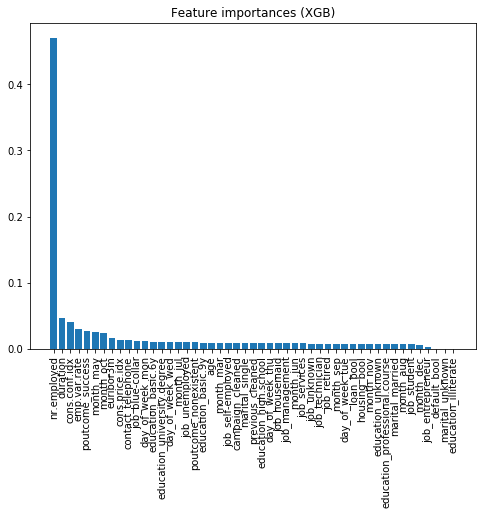

In [65]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

# As we can see from the diagram showing feature importances, the most important features are:

Customer's age,
Number of contacts performed during this campaign and contact duration,
Number of contacts performed before this campaign.

# So the main outcomes of the modelling are:

1.Customers of greater age are more likely to subscribe for the term deposit.

2.Number of contacts with the customers really matters. Too many contacts with the customer could make him decline the offer.

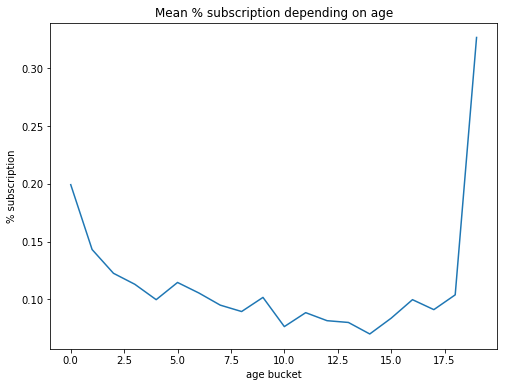

In [66]:
df_new = cleaned_df.copy()

df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_age = df_new.groupby(['age_buckets'])['y_bool'].mean()

#plot
plt.plot(mean_age.index, mean_age.values)
plt.title('Mean % subscription depending on age')
plt.xlabel('age bucket')
plt.ylabel('% subscription')
plt.show()

In [67]:
df_new[df_new['age_buckets'] == 3]['age'].max()

31

In [68]:
df_new[df_new['age_buckets'] == 17]['age'].min()

53

 So we see that average subscrition rate tends to be higher for customers below 31 years old or above 56 years old.